# OBJECTIVE OF THIS NOTEBOOK

This notebook is created as a task for internship at MONOXOR 

In this data you will find the request payload and you will also find a field "isSafe" which basically tells if the request is safe or not for the app. We have looked at fields in each request and have marked a request as not safe if any of the fields contain malicious input from the user in to perform owasp top 10 attacks. Therefore, If value of isSafe is False, it means the request should be blocked. 

Based on the problem statement develop a machine learning model to categorize the application requests as safe or not.

NOTE : I have converted JSON formt data into CSV which i will also upload in github repo

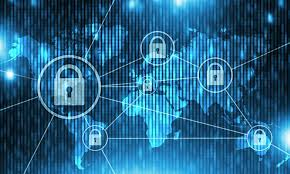

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/intern/convertcsv.csv')

In [2]:
pd.set_option('display.max_columns',None)
df.head()

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False


In [3]:
print('Shape of Dataset',df.shape)

Shape of Dataset (1000, 23)


We have 23 columns and 1000 rows in our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   req/baseUrl                  1000 non-null   object
 1   req/body/note/title          1000 non-null   object
 2   req/body/note/desc           1000 non-null   object
 3   req/fresh                    1000 non-null   bool  
 4   req/headers/host             1000 non-null   object
 5   req/headers/user-agent       1000 non-null   object
 6   req/headers/content-type     1000 non-null   object
 7   req/headers/org_id           1000 non-null   object
 8   req/headers/user_session_id  1000 non-null   object
 9   req/headers/accept           1000 non-null   object
 10  req/headers/content-length   1000 non-null   int64 
 11  req/headers/user/name        1000 non-null   object
 12  req/headers/user/role        1000 non-null   object
 13  req/hostname                 1000 

DATASET description

we have :
1. 5 Boolean Type Data

2.One Integer Type Data

3.Rest is Categorical Data

# Check For Empty Data

In [5]:
import seaborn as sns

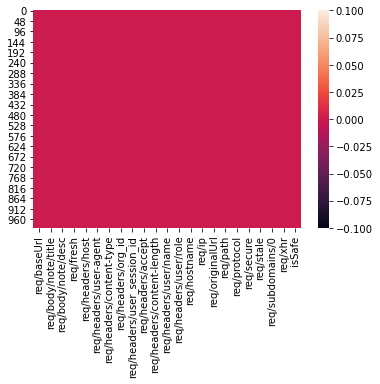

In [6]:
sns.heatmap(df.isnull())

We do not have any missing values in our data and it saves us from lots of problems

# EDA

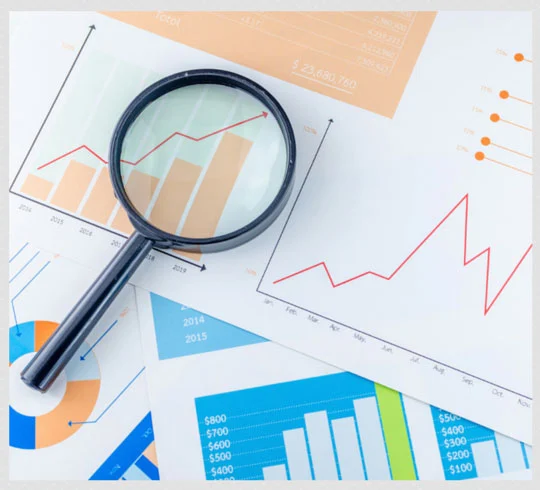

In [7]:
df.head(2)

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True


# Safe And UnSafe Ratio

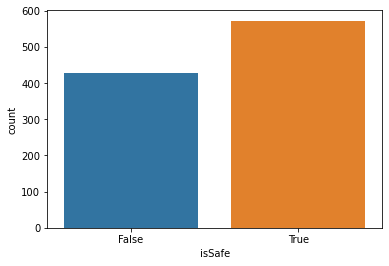

In [8]:
import seaborn as sns
sns.countplot(df['isSafe'])

Data is balanced and mostly requests are safe

# REQUEST TYPE

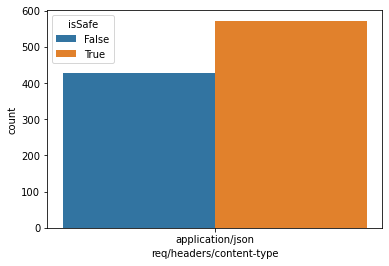

In [9]:
sns.countplot(df['req/headers/content-type'],hue=df['isSafe'])

In [10]:
df['req/headers/content-type'].value_counts()

application/json    1000
Name: req/headers/content-type, dtype: int64

## CONCLUSION 

All request types are of same type "application/json" , this means it is a constant feature and it will not have any sort of effect on classification model so it is best to remove this feature

In [11]:
df_1 = df.copy() #making copy of original data to apply changes on it


In [12]:
df_1 = df_1.drop('req/headers/content-type',axis=1)

In [13]:
pd.set_option('display.max_columns',None)
df_1.head(3)

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False


# REQUESTS : FRESH OR NOT

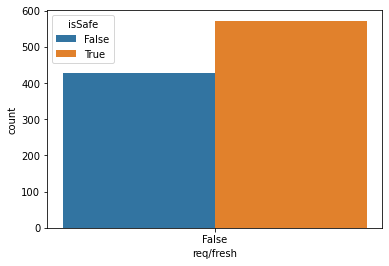

In [14]:
sns.countplot(df['req/fresh'],hue=df['isSafe'])

## CONCLUSION 

Here all requests are of same type and yet again it would not provide any information to our classification model !

# After furthur more EDA , I found out that most of the data is constant , meaning there is same value in all columns for data so we can not remove all the data and will have to deal with given data


# MAKING MODELS ON ORIGINAL DATA FOR SAFE/UNSAFE CLASSIFICATION

In [15]:
df_new = df.copy()

In [16]:
pd.set_option('display.max_columns',None)
df_new.head(2)

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True


Since all our columns have same values , I would convert all column values into some label so that i can pass it into different ML models

In [17]:
df_new.columns

Index(['req/baseUrl', 'req/body/note/title', 'req/body/note/desc', 'req/fresh',
       'req/headers/host', 'req/headers/user-agent',
       'req/headers/content-type', 'req/headers/org_id',
       'req/headers/user_session_id', 'req/headers/accept',
       'req/headers/content-length', 'req/headers/user/name',
       'req/headers/user/role', 'req/hostname', 'req/ip', 'req/originalUrl',
       'req/path', 'req/protocol', 'req/secure', 'req/stale',
       'req/subdomains/0', 'req/xhr', 'isSafe'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
columns_to_be_encoded = ['req/baseUrl',  'req/fresh',
       'req/headers/host', 'req/headers/user-agent',
       'req/headers/content-type',
       'req/headers/user_session_id', 'req/headers/accept',
        'req/headers/user/name',
       'req/headers/user/role', 'req/hostname', 'req/originalUrl',
       'req/path', 'req/secure', 'req/stale',
       'req/subdomains/0', 'req/xhr', 'isSafe']  # list of column names you want encoded

# Instantiate the encoders
encoders = {column: LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    df_new[column] = encoders[column].fit_transform(df_new[column])

In [19]:
df_new.head(5)

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,1
1,0,Clayton Cooper,As possible American many prepare four strong....,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,1
2,0,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,0
3,0,Laura Fisher,State third represent energy campaign not forg...,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,1
4,0,Tyler Santos,Us enjoy since. Time identify image position o...,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,0


I have converted all the features into numbers but left two columns , i would explain reason ahead

In [20]:
x = df_new[['req/baseUrl',  'req/fresh',
       'req/headers/host', 'req/headers/user-agent',
       'req/headers/content-type',
       'req/headers/user_session_id', 'req/headers/accept',
       'req/headers/content-length', 'req/headers/user/name',
       'req/headers/user/role', 'req/hostname',  'req/originalUrl',
       'req/path',  'req/secure', 'req/stale',
       'req/subdomains/0', 'req/xhr']]
y = df_new['isSafe']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y)

# LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [23]:
print('Accuracy on test set is : ',log.score(x_test,y_test)*100,'percent')

Accuracy on test set is :  56.99999999999999 percent


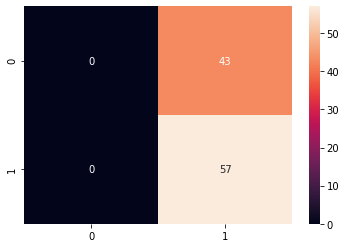

In [24]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix

sns.heatmap(clf(y_test,log.predict(x_test)),annot=True)

# DECISION TREE CLASSIFIER

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
print('Accuracy on test set is : ',tree.score(x_test,y_test)*100,'percent')

Accuracy on test set is :  56.99999999999999 percent


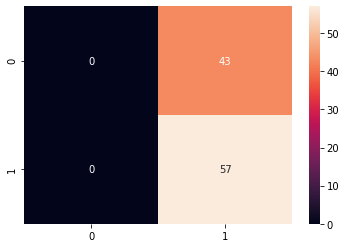

In [27]:
sns.heatmap(clf(y_test,tree.predict(x_test)),annot=True)

Same as previous One

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier()
boost.fit(x_train,y_train)
print('Accuracy on test set is : ',boost.score(x_test,y_test)*100,'percent')

Accuracy on test set is :  56.99999999999999 percent


In [29]:
x_train.shape

(900, 17)

We saw as our dataset is majority of Sparse Matrix and it contains highly of same number through out all columns , any ML model will fail to learn features and will give same output 

57 precent accuracy simply means our model is guessing whether request is safe or not so we would go for different approach which is RNN

# RNN FOR REQUEST CLASSIFICATION

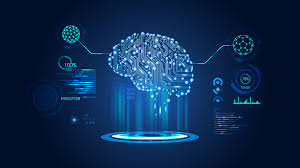

APPROACH : We will use Description of Note to create a model that will predict wethre request is Safe or Note based on the content of note description

In [30]:
df_new.head()

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,req/headers/content-length,req/headers/user/name,req/headers/user/role,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,1
1,0,Clayton Cooper,As possible American many prepare four strong....,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,1
2,0,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,0
3,0,Laura Fisher,State third represent energy campaign not forg...,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,1
4,0,Tyler Santos,Us enjoy since. Time identify image position o...,0,0,0,0,5f572820f65af8ac955b2e83,0,0,70,0,0,0,::ffff:117.99.96.244,0,0,http,0,0,0,0,0


In This approach we would label our target on basis of description of note of body

In [31]:
df_nn = df_new[['req/body/note/desc','isSafe']]

In [32]:
df_nn.head()

,req/body/note/desc,isSafe
0,Top recognize eat. Fact whom spend area thing ...,1
1,As possible American many prepare four strong....,1
2,Tuesday Notes or 2 like 2 XSP Class,0
3,State third represent energy campaign not forg...,1
4,Us enjoy since. Time identify image position o...,0


Converting isSafe into y array

In [33]:
import numpy as np
y = df_nn['isSafe']
y = np.array(y)


Converting text of column into x

In [34]:
x = df_nn['req/body/note/desc']
x = np.array(x)

TEXT PROCESSING

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)

In [37]:
len(tokenizer.word_index)

1010

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(x)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [39]:
padded_sequence.shape

(1000, 200)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [41]:
history = model.fit(padded_sequence,y,
                  validation_split=0.2, epochs=7, batch_size=32)

Epoch 1/7
25/25 [==============================] - 10s 410ms/step - loss: 0.6294 - accuracy: 0.6850 - val_loss: 0.5401 - val_accuracy: 0.7450
Epoch 2/7
25/25 [==============================] - 9s 357ms/step - loss: 0.4643 - accuracy: 0.7950 - val_loss: 0.4239 - val_accuracy: 0.8250
Epoch 3/7
25/25 [==============================] - 10s 384ms/step - loss: 0.4048 - accuracy: 0.8175 - val_loss: 0.4374 - val_accuracy: 0.8200
Epoch 4/7
25/25 [==============================] - 9s 364ms/step - loss: 0.3369 - accuracy: 0.8612 - val_loss: 0.4241 - val_accuracy: 0.8300
Epoch 5/7
25/25 [==============================] - 9s 360ms/step - loss: 0.1936 - accuracy: 0.9300 - val_loss: 0.5817 - val_accuracy: 0.7800
Epoch 6/7
25/25 [==============================] - 10s 383ms/step - loss: 0.1204 - accuracy: 0.9613 - val_loss: 0.5986 - val_accuracy: 0.7900
Epoch 7/7
25/25 [==============================] - 9s 365ms/step - loss: 0.1004 - accuracy: 0.9638 - val_loss: 0.7331 - val_accuracy: 0.7800


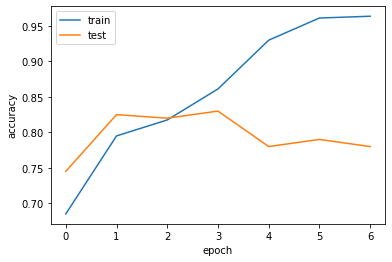

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

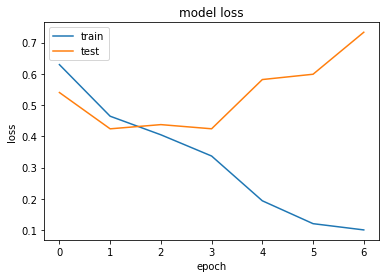

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Our Model is doing good , it can classify Test Data with 80 percent ccuracy but we have to improve this because we are facing over fitting

# PREVENTING OVERFITTING 

in first approh we would try to make our model simple by reducing number of neurons 

In [44]:
from tensorflow.keras import optimizers
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model2.add(SpatialDropout1D(0.25))
model2.add(LSTM(25, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(60,return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(10))
model2.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(lr=0.005, beta_1=0.8, beta_2=0.999, epsilon=1e-08, decay=0.0)
model2.compile(loss='binary_crossentropy',optimizer=opt, 
                           metrics=['accuracy'])

In [45]:
history = model2.fit(padded_sequence,y,
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 7s 287ms/step - loss: 0.5640 - accuracy: 0.7163 - val_loss: 0.4040 - val_accuracy: 0.8450
Epoch 2/10
25/25 [==============================] - 7s 271ms/step - loss: 0.3855 - accuracy: 0.8288 - val_loss: 0.4585 - val_accuracy: 0.7700
Epoch 3/10
25/25 [==============================] - 7s 262ms/step - loss: 0.2838 - accuracy: 0.8788 - val_loss: 0.4787 - val_accuracy: 0.7700
Epoch 4/10
25/25 [==============================] - 6s 249ms/step - loss: 0.1742 - accuracy: 0.9350 - val_loss: 0.5310 - val_accuracy: 0.8200
Epoch 5/10
25/25 [==============================] - 6s 252ms/step - loss: 0.1006 - accuracy: 0.9750 - val_loss: 0.8407 - val_accuracy: 0.7450
Epoch 6/10
25/25 [==============================] - 6s 247ms/step - loss: 0.0858 - accuracy: 0.9700 - val_loss: 0.7933 - val_accuracy: 0.7800
Epoch 7/10
25/25 [==============================] - 6s 252ms/step - loss: 0.0576 - accuracy: 0.9812 - val_loss: 0.8812 - val_accuracy: 0.7550
Epoch 

So even after changing the model we still get an accuracy about 80 percent on test data considering that fact this is based on one single columns

# EARLY STOPPING

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [49]:
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model3.add(SpatialDropout1D(0.25))
model3.add(LSTM(25, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(60,return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(10))
model3.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(lr=0.005, beta_1=0.8, beta_2=0.999, epsilon=1e-08, decay=0.0)
model2.compile(loss='binary_crossentropy',optimizer=opt, 
                           metrics=['accuracy'])


In [50]:
history = model2.fit(padded_sequence,y,
                  validation_split=0.2, epochs=10, batch_size=32,callbacks=[early_stopping])

Epoch 1/10
25/25 [==============================] - 8s 301ms/step - loss: 0.0496 - accuracy: 0.9900 - val_loss: 1.2284 - val_accuracy: 0.7650
Epoch 2/10
25/25 [==============================] - 6s 254ms/step - loss: 0.0299 - accuracy: 0.9925 - val_loss: 1.0726 - val_accuracy: 0.8000
Epoch 3/10
25/25 [==============================] - 6s 255ms/step - loss: 0.0260 - accuracy: 0.9925 - val_loss: 1.0714 - val_accuracy: 0.7850
Epoch 4/10
25/25 [==============================] - 7s 261ms/step - loss: 0.0415 - accuracy: 0.9837 - val_loss: 0.8524 - val_accuracy: 0.8200
Epoch 5/10
25/25 [==============================] - 6s 252ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 1.1799 - val_accuracy: 0.8100


Accuracy on TRAINING DATA : 99 percent

Accuracy on TESTING DATA : 81 percent

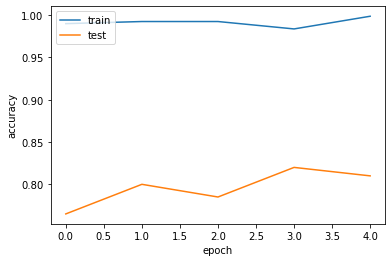

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# WORKING MODEL AND PREDICTION

In [46]:
    def predict(bodyNote):
        test_word = bodyNote
        tw = tokenizer.texts_to_sequences([test_word])
        tw = pad_sequences(tw,maxlen=200)
        prediction = int(model2.predict(tw).round().item())
        if(prediction==0):
            return('Not Safe')
        else:
            return('Safe')

In [47]:
predict('Top recognize eat. Fact whom spend area thing')

'Safe'